# How many foreign workers have entered the US since Obama took office on non-permanent Visas?
1. Show amount of workers a timeline
2. Show top ten companies hiring foreign workers
3. Use SOC-Code to establish most common job filings by state
4. Develop a map, colored by the percentage of the workforce, with a pictogramm of most common job with foreign workers in that state.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline
import dateutil.parser

# This I don't need to repeat again, jump to import of merged data

In [2]:
#H-2A Data
df_H2a_2015 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2015q4/H-2A_Disclosure_Data_FY15_Q4.xlsx')
df_H2a_2014 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2014q4/H-2A_FY14_Q4.xlsx')
df_H2a_2013 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2a/H2A_FY2013.xls')
df_H2a_2012 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2a/H-2A_FY2012.xlsx')
df_H2a_2011 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2a/H-2A_FY2011.xlsx')
df_H2a_2010 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2a/H-2A_FY2010.xlsx')
df_H2a_2009 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2a/H2A_FY2009.xlsx')

In [3]:
#H-2B Data
df_H2b_2015 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2015q4/H-2B_Disclosure_Data_FY15_Q4.xlsx')
df_H2b_2014 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2014q4/H-2B_FY14_Q4.xlsx')
df_H2b_2013 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2b/H-2B_FY2013.xls')
df_H2b_2012 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2b/H-2B_FY2012.xlsx')
df_H2b_2011 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2b/H-2B_FY2011.xlsx')
df_H2b_2010 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2b/H-2B_FY2010.xlsx')
df_H2b_2009 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/h_2b/H-2B_FY2009.xlsx')

In [4]:
#H-1B Data
df_H1b_2015 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2015q4/H-1B_Disclosure_Data_FY15_Q4.xlsx')
df_H1b_2014 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2014q4/H-1B_FY14_Q4.xlsx')
df_H1b_2013 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/LCA_FY2013.xlsx')
df_H1b_2012 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/py2012_q4/LCA_FY2012_Q4.xlsx')
df_H1b_2011 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_iCert_LCA_FY2011_Q4.xlsx')
df_H1b_2010 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_FY2010.xlsx')
df_H1b_2009 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/Icert_%20LCA_%20FY2009.xlsx')
df_H1b_2009_2 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_Case_Data_FY2009.xlsx')

In [73]:
#Pulling out relevant columns H2B
df_H2b_2015_ = df_H2b_2015[["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]].copy()
df_H2b_2014_ = df_H2b_2014[["RECENT_DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVIALING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', 'SOC_NAME',"VISA_CLASS"]].copy()
df_H2b_2013_ = df_H2b_2013[["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVIALING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', 'SOC_NAME',"VISA_CLASS"]].copy()
df_H2b_2012_ = df_H2b_2012[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', 'SOC_NAME',"VISA_CLASS"]].copy()
df_H2b_2011_ = df_H2b_2011[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', 'SOC_NAME',"VISA_CLASS"]].copy()
df_H2b_2010_ = df_H2b_2010[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', 'DOT_OCCUPATIONAL_CODE',"APPLICATION_TYPE"]].copy()
df_H2b_2009_ = df_H2b_2009[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "ALIEN_WORK_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE']].copy()

In [75]:
#Pulling out relevant columns H2A
df_H2a_2015_ = df_H2a_2015[["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]].copy()
df_H2a_2014_ = df_H2a_2014[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_LOCATION_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]].copy()
df_H2a_2013_ = df_H2a_2013[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', "VISA_CLASS"]].copy()
df_H2a_2012_ = df_H2a_2012[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', "VISA_CLASS"]].copy()
df_H2a_2011_ = df_H2a_2011[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE', "APPLICATION_TYPE"]].copy()
df_H2a_2010_ = df_H2a_2010[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE',]].copy()
df_H2a_2009_ = df_H2a_2009[["DECISION_DATE", "CASE_NO", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'ALIEN_WORK_STATE', 'JOB_TITLE',]].copy()

In [76]:
#Pulling out relevant columns H1B
df_H1b_2015_ = df_H1b_2015[['DECISION_DATE', 'CASE_NUMBER', "CASE_STATUS", "EMPLOYER_STATE", 'EMPLOYER_NAME', 'TOTAL WORKERS', 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_NAME', "VISA_CLASS"]].copy()
df_H1b_2014_ = df_H1b_2014[['DECISION_DATE', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_STATE', 'LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME', 'VISA_CLASS']].copy()
df_H1b_2013_ = df_H1b_2013[['Decision_Date', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_STATE','LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME', 'VISA_CLASS']].copy()
df_H1b_2012_ = df_H1b_2012[['DECISION_DATE', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_STATE','LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME', 'VISA_CLASS']].copy()
df_H1b_2011_ = df_H1b_2011[['DECISION_DATE', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_STATE','LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME', 'VISA_CLASS']].copy()
df_H1b_2010_ = df_H1b_2010[['DECISION_DATE', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'WORK_LOCATION_STATE1','LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME']].copy() 
df_H1b_2009_ = df_H1b_2009[['Decision_Date', 'LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_NAME', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_STATE','LCA_CASE_JOB_TITLE', 'LCA_CASE_SOC_NAME', 'VISA_CLASS']].copy()
df_H1b_2009_2_ = df_H1b_2009_2[['DOL_DECISION_DATE', 'CASE_NO', 'APPROVAL_STATUS', 'EMPLOYER_STATE', 'EMPLOYER_NAME', 'NBR_IMMIGRANTS', 'STATE_1','JOB_TITLE', 'OCCUPATIONAL_TITLE', 'PROGRAM_DESIGNATION']].copy()

In [77]:
#Renaming them
df_H2b_2015_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2014_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2013_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2012_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2011_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2010_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE', "VISA_CLASS"]
df_H2b_2009_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "PREVAILING_WAGE", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE',]

In [78]:
df_H2a_2015_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H2a_2014_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H2a_2013_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', "VISA_CLASS"]
df_H2a_2012_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', "VISA_CLASS"]
df_H2a_2011_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE', "VISA_CLASS"]
df_H2a_2010_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE']
df_H2a_2009_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", "BASIC_UNIT_OF_PAY", "BASIC_RATE_OF_PAY", 'WORKSITE_STATE', 'JOB_TITLE']

In [91]:
df_H1b_2015_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H1b_2014_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H1b_2013_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H1b_2012_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H1b_2011_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE', 'SOC_TITLE',"VISA_CLASS"]
df_H1b_2010_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE','SOC_TITLE']
df_H1b_2009_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE','SOC_TITLE', "VISA_CLASS"]
df_H1b_2009_2_.columns = ["DECISION_DATE", "CASE_NUMBER", "CASE_STATUS", "EMPLOYER_STATE", "EMPLOYER_NAME", "NBR_WORKERS_CERTIFIED", 'WORKSITE_STATE', 'JOB_TITLE','SOC_TITLE', "VISA_CLASS"]

In [93]:
df = pd.concat([df_H1b_2009_2_, df_H1b_2009_, df_H1b_2010_, df_H1b_2011_, df_H1b_2012_, df_H1b_2013_, df_H1b_2014_, df_H1b_2015_, df_H2b_2015_, df_H2b_2014_, df_H2b_2013_, df_H2b_2012_, df_H2b_2011_, df_H2b_2010_, df_H2b_2009_, df_H2a_2015_, df_H2a_2014_, df_H2a_2013_, df_H2a_2012_, df_H2a_2011_, df_H2a_2010_, df_H2a_2009_], ignore_index=True)

In [115]:
def certification(x):
    if x == 'Certified - Full':
        return 'CERTIFIED'
    elif x == 'DETERMINATION ISSUED - CERTIFICATION':
        return 'CERTIFIED'
    elif x == 'Certification':
        return 'CERTIFIED'
    #This is okay, as when it's partial only a certain number of workers are then certified
    elif x == 'Certified - Partial':
        return 'CERTIFIED'
    elif x == 'Partial Certification':
        return 'CERTIFIED'
    elif x == 'DETERMINATION ISSUED - CERTIFICATION EXPIRED':
        return 'CERTIFIED'
    elif x == 'Partial Certified':
        return 'CERTIFIED'
    elif x == 'PARTIAL CERTIFIED':
        return 'CERTIFIED'
    elif x == 'PARTIAL CERTIFIED':
        return 'CERTIFIED'
    elif x == 'DETERMINATION ISSUED - PARTIAL CERTIFICATION':
        return 'CERTIFIED'
    elif x == 'Certified':
        return 'CERTIFIED'
    else:
        return x

In [116]:
df['CASE_STATUS'] = df['CASE_STATUS'].apply(certification)

In [117]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                               2722188
CERTIFIED-WITHDRAWN                                      188644
DENIED                                                   149254
WITHDRAWN                                                 84368
Denied                                                     2536
Withdrawn                                                  2024
DETERMINATION ISSUED - DENIED                               323
DETERMINATION ISSUED - WITHDRAWN                            307
Certification Expired                                       305
Partial Certification Expired                                73
DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED         41
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED           15
FINAL REVIEW                                                  2
REJECTED                                                      2
INVALIDATED                                                   1
Name: CASE_STATUS, dtype: int64

In [121]:
df[df['CASE_STATUS'] == 'CERTIFIED']['NBR_WORKERS_CERTIFIED'].sum()

6982775.0

In [128]:
df.to_csv('Temporary_Worker_Visas_2009_2015.csv')

# Temporary_Worker_Visas_2009_2015.csv

In [13]:
df = pd.read_csv('data/Temporary_Worker_Visas_2009_2015.csv', dtype='str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150083 entries, 0 to 3150082
Data columns (total 14 columns):
DECISION_DATE            object
BASIC_RATE_OF_PAY        object
BASIC_UNIT_OF_PAY        object
CASE_NUMBER              object
CASE_STATUS              object
DECISION_DATE.1          object
EMPLOYER_NAME            object
EMPLOYER_STATE           object
JOB_TITLE                object
NBR_WORKERS_CERTIFIED    object
PREVAILING_WAGE          object
SOC_TITLE                object
VISA_CLASS               object
WORKSITE_STATE           object
dtypes: object(14)
memory usage: 336.5+ MB


In [15]:
def parse_date(str_date):
    try:
        return dateutil.parser.parse(str_date)
    except:
        None

In [22]:
def certifications(str_):
    try:
        return int(str_)
    except:
        None

In [17]:
df['DECISION_DATE'] = df['DECISION_DATE'].apply(parse_date)

In [23]:
df['NBR_WORKERS_CERTIFIED'] = df['NBR_WORKERS_CERTIFIED'].apply(certifications)

In [20]:
df.index = df['DECISION_DATE']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3150083 entries, 2008-10-01 00:00:00 to 2009-09-28 17:15:08
Data columns (total 14 columns):
DECISION_DATE            datetime64[ns]
BASIC_RATE_OF_PAY        object
BASIC_UNIT_OF_PAY        object
CASE_NUMBER              object
CASE_STATUS              object
DECISION_DATE.1          object
EMPLOYER_NAME            object
EMPLOYER_STATE           object
JOB_TITLE                object
NBR_WORKERS_CERTIFIED    object
PREVAILING_WAGE          object
SOC_TITLE                object
VISA_CLASS               object
WORKSITE_STATE           object
dtypes: datetime64[ns](1), object(13)
memory usage: 360.5+ MB


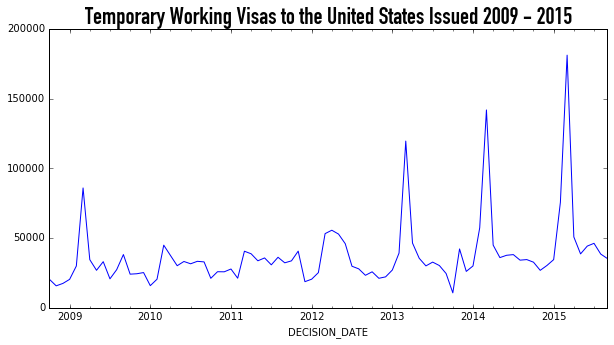

In [24]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.resample('M')['CASE_NUMBER'].count().plot(ax=ax)
ax.set_title("Temporary Working Visas to the United States Issued 2009 - 2015", fontname='DIN Condensed', fontsize=24)
plt.savefig('Temp_Visas.png', transparent=True, bbox_inches='tight')

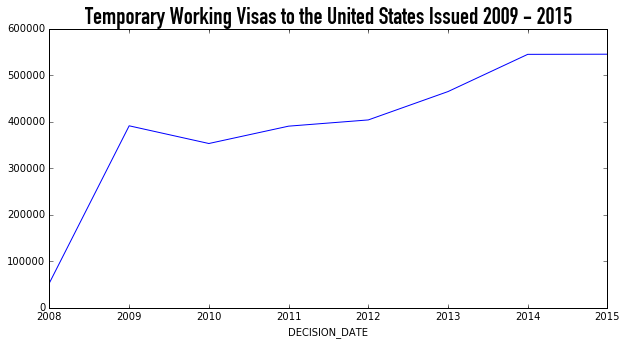

In [25]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.resample('A')['CASE_NUMBER'].count().plot(ax=ax)
ax.set_title("Temporary Working Visas to the United States Issued 2009 - 2015", fontname='DIN Condensed', fontsize=24)
plt.savefig('Temp_Visas.png', transparent=True, bbox_inches='tight')

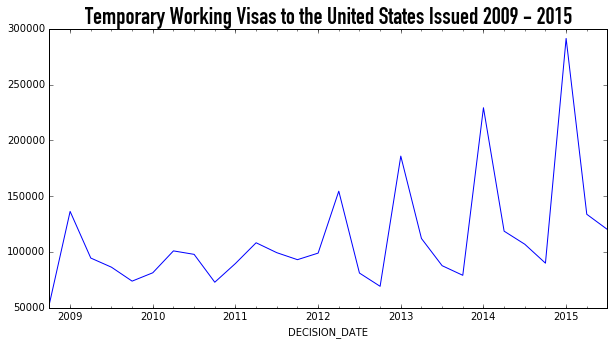

In [26]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.resample('Q')['CASE_NUMBER'].count().plot(ax=ax)
ax.set_title("Temporary Working Visas to the United States Issued 2009 - 2015", fontname='DIN Condensed', fontsize=24)
plt.savefig('Temp_Visas.png', transparent=True, bbox_inches='tight')

In [27]:
df['WORKSITE_STATE'].value_counts().head(10)

CA    569314
NY    319600
TX    291565
NJ    217547
IL    161478
MA    122236
FL    119247
PA    113386
WA    103223
VA     99977
Name: WORKSITE_STATE, dtype: int64

# Creating the Certified DF to export for the map

In [28]:
CERTIFIED_df = df[df['CASE_STATUS'] == 'CERTIFIED']

In [130]:
NBR_WORKERS_PERSTATE = pd.DataFrame(CERTIFIED_df.groupby('WORKSITE_STATE')['NBR_WORKERS_CERTIFIED'].sum().sort_values(ascending=False))

In [132]:
NBR_WORKERS_PERSTATE.reset_index(inplace=True)

In [133]:
def int_(x):
    return int(x)

In [134]:
NBR_WORKERS_PERSTATE['NBR_WORKERS_CERTIFIED'] = NBR_WORKERS_PERSTATE['NBR_WORKERS_CERTIFIED'].apply(int)

In [136]:
NBR_WORKERS_PERSTATE.head()

,WORKSITE_STATE,NBR_WORKERS_CERTIFIED
0,CA,1009233
1,TX,577319
2,NY,551747
3,NJ,412148
4,IL,326580


In [ ]:
# Looking into which job is top per State

In [ ]:
Worksite_state_list = df['WORKSITE_STATE'].tolist()

In [141]:
Unique_list = set(Worksite_state_list)

In [144]:
for x in Unique_list:
    Job = df[df['WORKSITE_STATE'] == x].groupby('SOC_TITLE')['NBR_WORKERS_CERTIFIED'].sum().sort_values(ascending=False).head(1)
    print(x, ':', Job)

nan : Series([], Name: NBR_WORKERS_CERTIFIED, dtype: float64)
MH : SOC_TITLE
Dishwashers    14.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
WI : SOC_TITLE
Computer Systems Analysts    25857.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
ME : SOC_TITLE
Maids and Housekeeping Cleaners    2124.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
MA : SOC_TITLE
Computer Systems Analysts    31665.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
PW : SOC_TITLE
Software Developers, Applications    1.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
AK : SOC_TITLE
Cutters and Trimmers, Hand    959.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
CT : SOC_TITLE
Computer Software Engineers, Applications    55331.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
OR : SOC_TITLE
Computer Systems Analysts    9364.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
DC : SOC_TITLE
Computer Systems Analysts    3959.0
Name: NBR_WORKERS_CERTIFIED, dtype: float64
NC : SOC_TITLE
Farmworkers and Laborers, Crop, Nursery, and    54662.

In [154]:
# Work rate and people highered
Top_jobs_by_state = []
for x in Unique_list:
    Job = df[df['WORKSITE_STATE'] == x].groupby('SOC_TITLE')['NBR_WORKERS_CERTIFIED'].sum().sort_values(ascending=False).head(1)
    Job = str(Job)
    Job = Job.replace('SOC_TITLE', '')
    Job = Job.replace('/n', '')
    Job = Job.replace('Name: NBR_WORKERS_CERTIFIED, dtype: float64', '')
    
    State_jobs = {'state:': x,
                 'job': Job}
    
    Top_jobs_by_state.append(State_jobs)


In [157]:
df_top_jobs = pd.DataFrame.from_dict(Top_jobs_by_state)

In [159]:
df_top_jobs.head()

,job,state:
0,"Series([], )",NaN
1,\nDishwashers 14.0\n,MH
2,\nComputer Systems Analysts 25857.0\n,WI
3,\nMaids and Housekeeping Cleaners 2124.0\n,ME
4,\nComputer Systems Analysts 31665.0\n,MA


In [161]:
df_top_jobs.to_csv('Top_jobs_states.csv')

# Creating temporary worker % of Work force 

In [173]:
#Getting certified workers for 2015
CERTIFIED_2015 = CERTIFIED_df['2015']

In [176]:
VISA_Counts_per_State = pd.DataFrame(CERTIFIED_2015.groupby('WORKSITE_STATE')['NBR_WORKERS_CERTIFIED'].sum().sort_values(ascending=False))

In [181]:
VISA_Counts_per_State_2015 = VISA_Counts_per_State.reset_index()

In [184]:
VISA_Counts_per_State.head()

,WORKSITE_STATE,NBR_WORKERS_CERTIFIED
0,CA,185570.0
1,TX,102972.0
2,NY,89532.0
3,NJ,76416.0
4,NC,60513.0


In [182]:
df_workforce = pd.read_csv('data/STATE_WORKING_FORCE_RATE.csv')

In [183]:
df_workforce.head()

,State Full Name,Working Force,State
0,Alaska,364910,AK
1,Alabama,2157591,AL
2,Arkansas,1336245,AR
3,Arizona,3148508,AZ
4,California,19036611,CA


In [185]:
#Bringing in number of foreign temporary Workers per state
df_mapping_data = VISA_Counts_per_State.merge(df_workforce, left_on = 'WORKSITE_STATE', right_on = 'State')

In [186]:
df_mapping_data = df_mapping_data.merge(df_top_jobs, left_on = 'WORKSITE_STATE', right_on = 'state:')

In [188]:
df_mapping_data['TEMP WORKERS PERCENTAGE'] = df_mapping_data['NBR_WORKERS_CERTIFIED'] / df_mapping_data['Working Force'] * 100

In [192]:
df_mapping_data.sort_values('TEMP WORKERS PERCENTAGE', ascending=False)

,WORKSITE_STATE,NBR_WORKERS_CERTIFIED,State Full Name,Working Force,State,job,state:,TEMP WORKERS PERCENTAGE
3,NJ,76416.0,New Jersey,4552979,NJ,\nComputer Systems Analysts 81238.0\n,NJ,1.678374
7,WA,54037.0,Washington,3545995,WA,\nComputer Programmers 7016672.0\n,WA,1.523888
28,DE,7031.0,Delaware,464051,DE,\nComputer Systems Analysts 9567.0\n,DE,1.515135
4,NC,60513.0,North Carolina,4827901,NC,"\nFarmworkers and Laborers, Crop, Nursery, and...",NC,1.253402
10,MA,41461.0,Massachusetts,3560302,MA,\nComputer Systems Analysts 31665.0\n,MA,1.164536
14,CT,21359.0,Connecticut,1895146,CT,"\nComputer Software Engineers, Applications ...",CT,1.127037
8,GA,52616.0,Georgia,4798766,GA,\nComputer Systems Analysts 42396.0\n,GA,1.096449
0,CA,185570.0,California,19036611,CA,\nComputer Systems Analysts 152163.0\n,CA,0.974806
5,PA,59740.0,Pennsylvania,6462242,PA,\nAdministrative Services Managers 793227.0\n,PA,0.924447
2,NY,89532.0,New York,9709479,NY,"\nDesigners, All Other 2032230.0\n",NY,0.922109


In [193]:
del df_mapping_data['State']

In [194]:
del df_mapping_data['state:']

In [196]:
df_mapping_data.to_csv('VISA_DATA_BY_STATE_to_be_mapped.csv')

In [2]:
df_mapping_data = pd.read_csv('data/VISA_DATA_BY_STATE_to_be_mapped.csv')

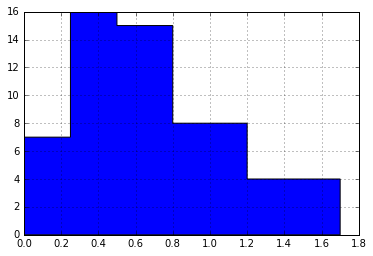

In [30]:
df_mapping_data['TEMP WORKERS PERCENTAGE'].hist(bins=[0, 0.25, .5, .8, 1.2, 1.7], histtype = 'stepfilled')
#r = 0, 0.25, .5, .8, 1.2, 1.7
#histfit(r)
#Using this to help create a waving line:
#http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
plt.savefig('HIST_DISTRIBUTION.pdf', transparent=True, bbox_inches='tight')

In [15]:
df_mapping_data['TEMP WORKERS PERCENTAGE'].describe()

count    50.000000
mean      0.622489
std       0.367315
min       0.094605
25%       0.377999
50%       0.536105
75%       0.781705
max       1.678374
Name: TEMP WORKERS PERCENTAGE, dtype: float64

In [16]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [26]:
mu = 0.622489  # mean of distribution
sigma = 0.367315  # standard deviation of distribution
x = mu + sigma * df_mapping_data['TEMP WORKERS PERCENTAGE']
num_bins = 5

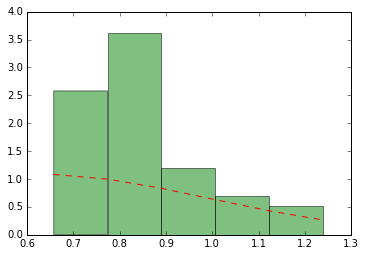

In [27]:
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.subplots_adjust(left=0.15)
plt.show()

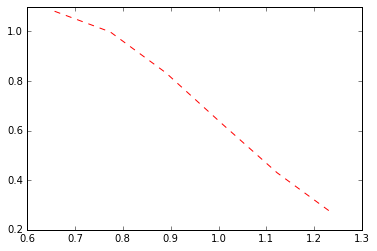

# Looking into the VISA classes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3150083 entries, 2008-10-01 00:00:00 to 2009-09-28 17:15:08
Data columns (total 14 columns):
DECISION_DATE            datetime64[ns]
BASIC_RATE_OF_PAY        object
BASIC_UNIT_OF_PAY        object
CASE_NUMBER              object
CASE_STATUS              object
DECISION_DATE.1          object
EMPLOYER_NAME            object
EMPLOYER_STATE           object
JOB_TITLE                object
NBR_WORKERS_CERTIFIED    object
PREVAILING_WAGE          object
SOC_TITLE                object
VISA_CLASS               object
WORKSITE_STATE           object
dtypes: datetime64[ns](1), object(13)
memory usage: 360.5+ MB


In [33]:
df_H1B = df[df['VISA_CLASS'] == 'H-1B']

In [39]:
df_H1B['CASE_STATUS'].value_counts()

CERTIFIED                                             2068250
CERTIFIED-WITHDRAWN                                    158321
DENIED                                                  96871
WITHDRAWN                                               71278
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         14
REJECTED                                                    2
Name: CASE_STATUS, dtype: int64

In [40]:
df_H1b_2010 = pd.read_excel('https://www.foreignlaborcert.doleta.gov/docs/lca/H-1B_FY2010.xlsx')

In [41]:
df_H1b_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342575 entries, 0 to 342574
Data columns (total 33 columns):
LCA_CASE_NUMBER                   342575 non-null object
STATUS                            342575 non-null object
LCA_CASE_SUBMIT                   342575 non-null datetime64[ns]
DECISION_DATE                     342575 non-null datetime64[ns]
LCA_CASE_EMPLOYMENT_START_DATE    342529 non-null datetime64[ns]
LCA_CASE_EMPLOYMENT_END_DATE      342529 non-null datetime64[ns]
LCA_CASE_EMPLOYER_NAME            342511 non-null object
LCA_CASE_EMPLOYER_ADDRESS1        342500 non-null object
LCA_CASE_EMPLOYER_ADDRESS2        127523 non-null object
LCA_CASE_EMPLOYER_CITY            342499 non-null object
LCA_CASE_EMPLOYER_STATE           342484 non-null object
LCA_CASE_EMPLOYER_POSTAL_CODE     316308 non-null float64
LCA_CASE_SOC_CODE                 342503 non-null object
LCA_CASE_SOC_NAME                 338540 non-null object
LCA_CASE_JOB_TITLE                342526 non-null object
L